# Predicting Future Sales with Different Models

## Introduction

In today's competitive business environment, accurately forecasting future sales is crucial for optimizing inventory management and reducing logistical costs. Effective sales forecasts enable companies to maintain the right balance of stock levels, ensuring they can meet customer demand without incurring excess inventory costs.

This notebook presents a comprehensive approach to forecasting sales using various predictive models. By leveraging historical sales data, we aim to predict future sales volumes with high accuracy. This will allow for more informed decision-making regarding inventory procurement, production planning, and distribution strategies.

## Objective

The main objective of this analysis is to use data science techniques to forecast future sales volumes accurately. This will help in optimizing inventory levels, improving supply chain efficiency, and ultimately reducing costs associated with overstocking or stockouts. We will explore several predictive modeling techniques and evaluate their performance in forecasting sales.

---



## Importing Necessary Libraries

To kickstart our analysis, we first import the necessary Python libraries that provide the tools for data manipulation, visualization, model building, and evaluation:

- **Numpy** and **Pandas**: Essential for handling numerical operations and data manipulation, respectively. Numpy offers support for complex mathematical operations over large multi-dimensional arrays, making it foundational for scientific computing in Python. Pandas brings high-performance, easy-to-use data structures, facilitating robust data analysis workflows.
- **Matplotlib** and **Seaborn**: These libraries are our gateways to data visualization, offering a wide range of plotting options. Matplotlib provides the foundation for creating static, interactive, and animated visuals in Python. Seaborn extends Matplotlib by offering a higher-level interface for drawing attractive and informative statistical graphics.
- **Scikit-learn (Sklearn)**: A versatile machine learning library for Python, featuring various algorithms for classification, regression, and clustering. It is designed for interoperability with Numpy and SciPy, making it a critical tool for predictive modeling.
- **Statsmodels**: Offers extensive capabilities for estimating and interpreting models for statistical analysis. It's particularly useful for its time series analysis functions, which we will leverage for this project.
- **Prophet**: Developed by Facebook, Prophet is designed for forecasting with daily observations that display patterns on different time scales. It is robust to missing data and shifts in the trend and typically handles outliers well.

These libraries form the backbone of our data analysis and modeling in this notebook.


## Data Exploration and Preprocessing

Data exploration is a critical initial step in any data analysis project. It involves understanding the basic structure of the data, identifying potential anomalies or irregularities, and summarizing the main characteristics of the dataset. This phase helps in uncovering patterns, spotting anomalies, understanding data distribution, and finding out if there are any correlations between different variables.

Following data exploration, preprocessing is performed to clean and prepare the data for modeling. This may involve handling missing values, encoding categorical variables, normalizing or standardizing numerical variables, and creating or transforming features. The goal of preprocessing is to transform raw data into a clean dataset that can be used effectively by predictive models.

In this section, we will conduct a thorough exploration of the sales data, followed by preprocessing steps to prepare the data for predictive modeling. This will include visualizations to understand data distribution and correlations, as well as cleaning steps such as dealing with missing values and feature engineering.


In [50]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic  import DeterministicProcess, CalendarFourier
from prophet import Prophet


**Exploratory Date Analysis**

Importing the data partitioning the dates 

In [51]:
df = pd.read_csv(r'Sample - Superstore.csv', encoding='ISO-8859-1')
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['month'] = pd.to_datetime(df['Order Date']).dt.to_period('M')
df['day'] = pd.to_datetime(df['Order Date']).dt.day_of_week+1
df.head()

Row ID        Order ID Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

        Product ID         Category Sub-Category  \
0  FUR-BO-10001798        Furniture    Bookcases   
1  FUR-CH-10000454        Furniture       Chairs   
2  OFF-LA-10000240  Office Supplies       Labels   
3  FUR-TA-10000577        Furniture       Tables   
4  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600        2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400        3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200        2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775        5   
4                     Eldon Fold 'N Roll Cart System   22.3680        2   

  Discount    Profit    month  day  
0     0.00   41.9136  2016-11    2  
1     0.00  219.5820  2016-11    2  
2     0.00    6.8714  2016-06    7  
3     0.45 -383.0310  2015-10    7  
4     0.20    2.5164  2015-10    7  

[5 rows x 23 columns]

In [52]:
df['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

In [53]:
print(df['Category'].value_counts())
print('\n',df['Sub-Category'].value_counts())

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

 Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64


## Model Explanation and Selection

Predictive modeling is at the heart of this project, where the aim is to forecast future sales based on historical data. Selecting the right model is crucial as it impacts the accuracy and reliability of the forecasts. In this project, we explore various models, each with its strengths and applications:

- **Linear Regression**: A simple yet powerful model for predicting a quantitative response. It's particularly useful when there is a linear relationship between the predictors and the response variable.
- **Time Series Analysis (Prophet)**: Time series models are ideal for forecasting tasks where data points are collected or indexed in time order. Prophet, developed by Facebook, is designed for forecasting time series data with daily observations that display patterns on different time scales.
- **Other Models**: Depending on the initial findings, we may explore additional models suitable for time series forecasting.

This section will delve into each model's theoretical background, applicability to our sales forecasting task, and the rationale behind selecting certain models for evaluation.


Choosing our aggregation level as month because thats the restock interval

In [54]:
monthly_sales = df.groupby('month')['Sales'].sum()
monthly_sales = pd.DataFrame(monthly_sales)
monthly_sales['time'] = np.arange(len(monthly_sales.index))
Daily_sales = df.groupby('day')['Sales'].sum()
Daily_sales = pd.DataFrame(Daily_sales)
Daily_sales['time'] = np.arange(len(Daily_sales.index))
monthly_sales.head()
Daily_sales.head()


Sales  time
day                   
1    428937.8157     0
2    287209.5022     1
3     88056.9752     2
4    321965.7785     3
5    427692.2593     4

Trying to predict using advanced yet naive methods

Using regplot to visualize linear regression with CI for monthly sales in different orders

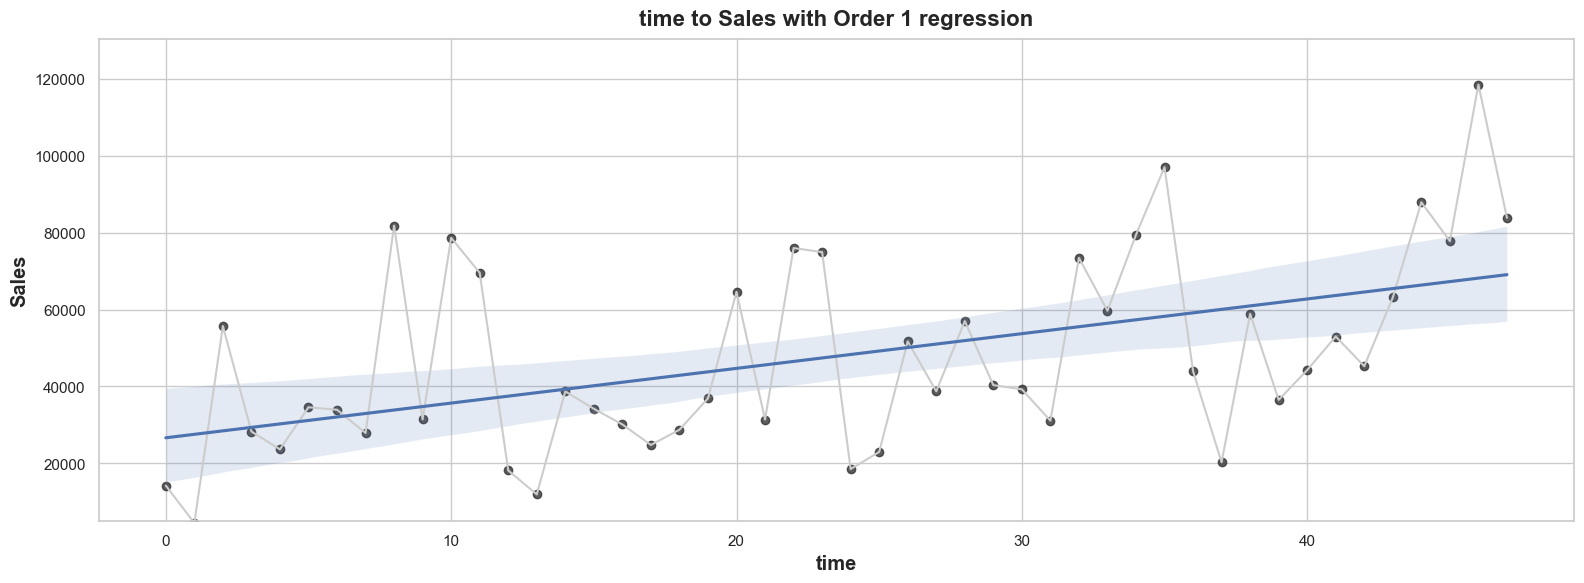

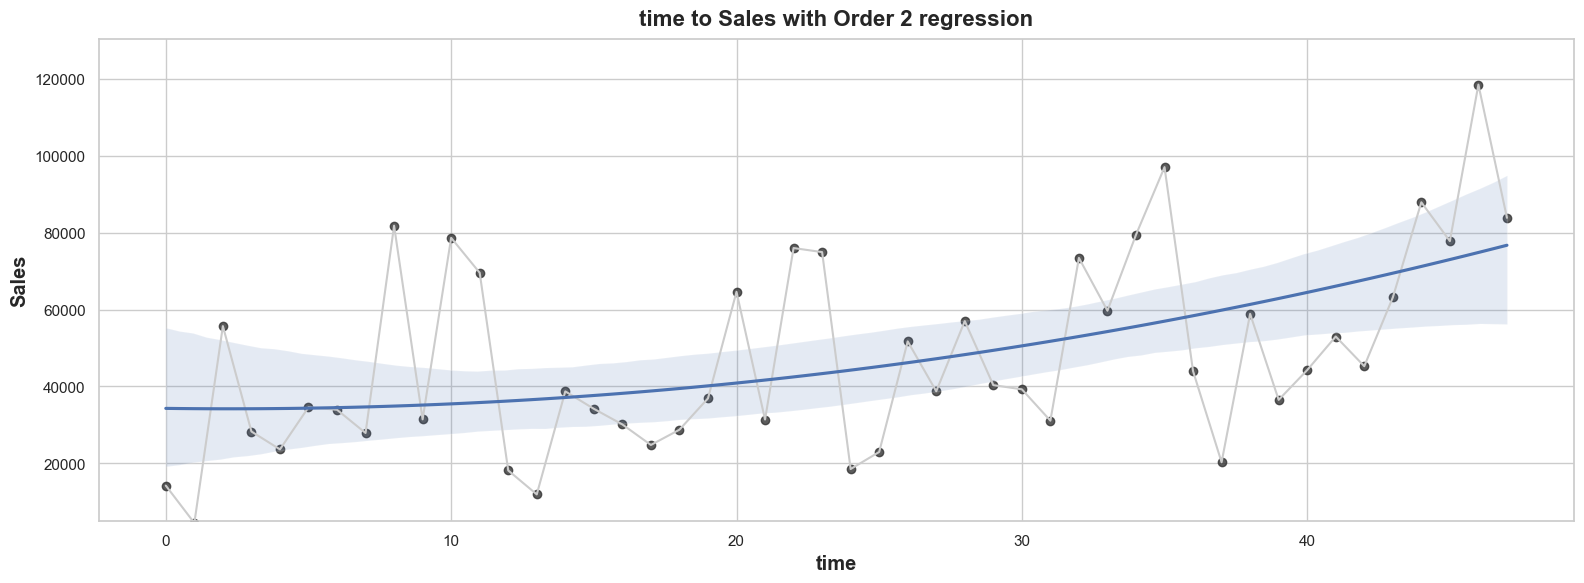

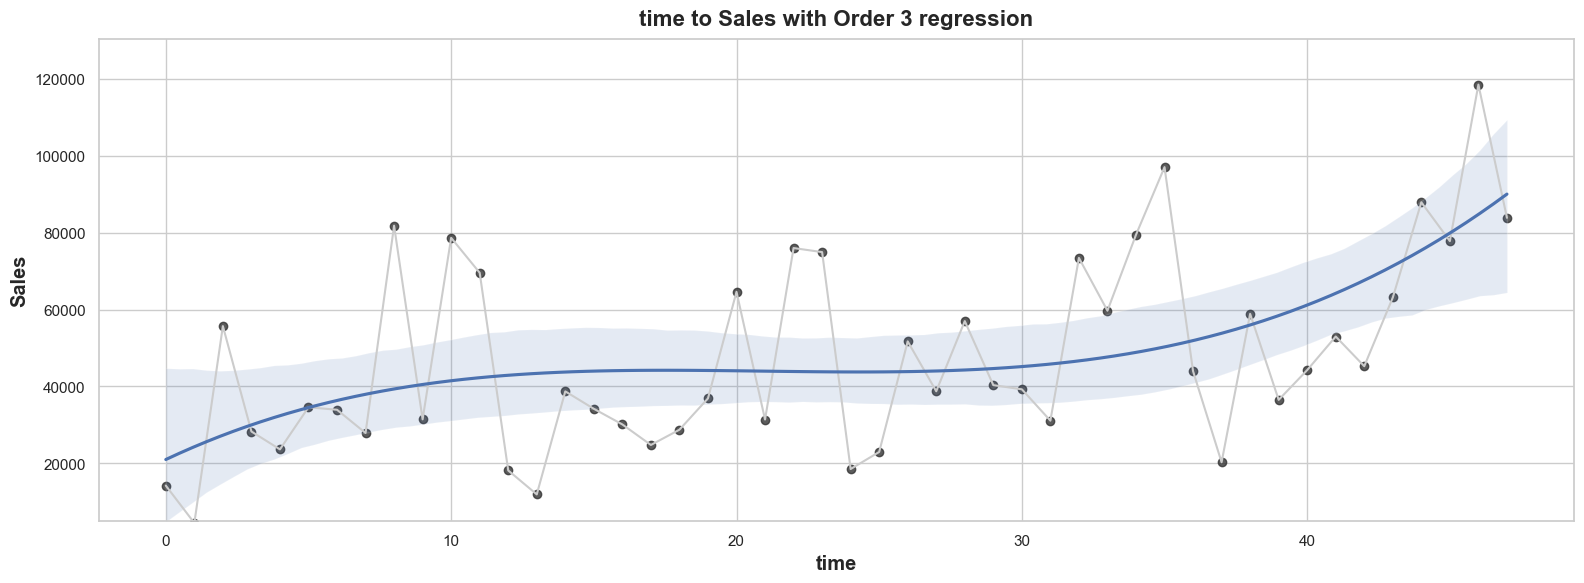

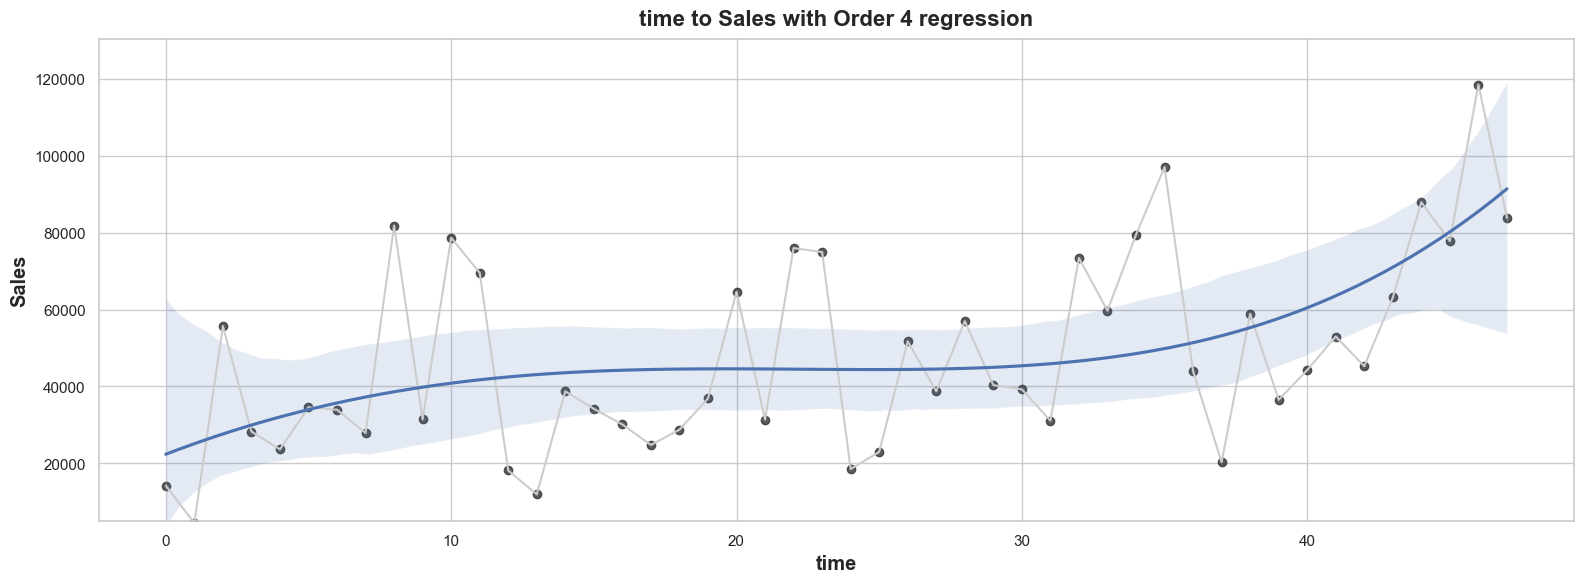

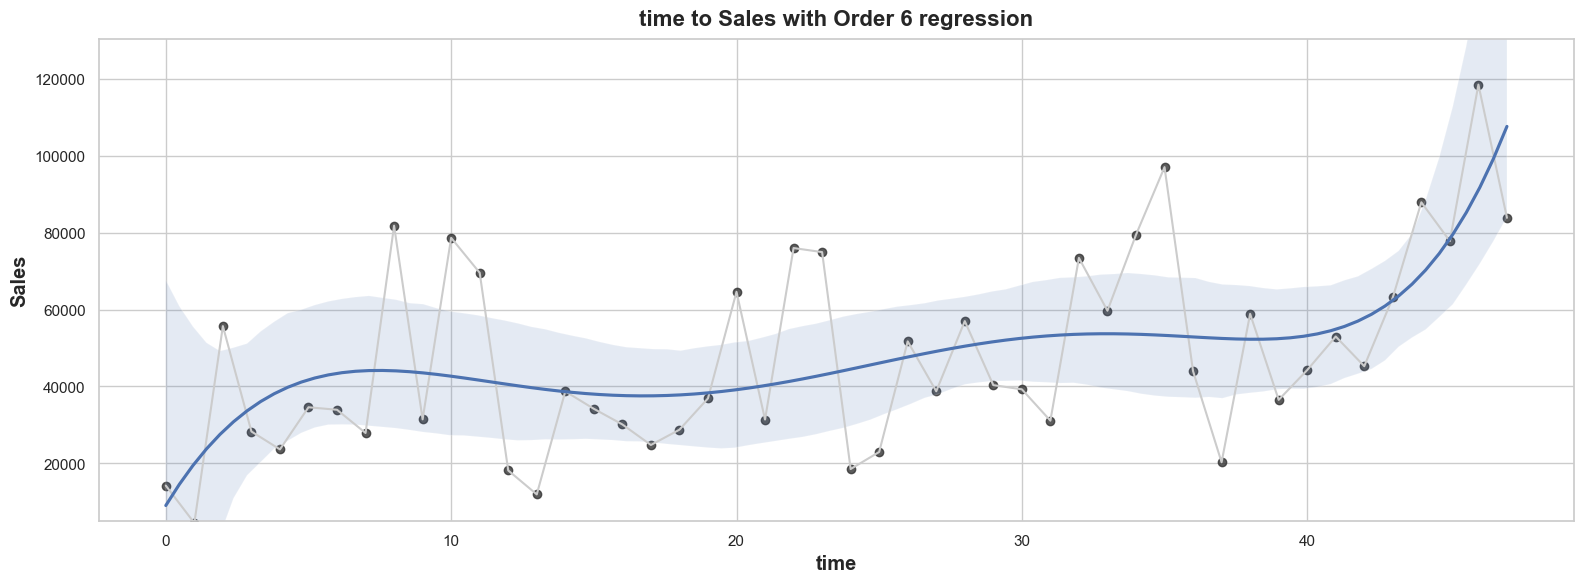

In [55]:

def plot_trend(df,dfx,dfy,order=1):
    sns.set_style('whitegrid')
    plt.rc('figure', autolayout = True, figsize= (16,6), titlesize = 12, titleweight = 'bold')
    plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold",titlesize=16,titlepad=10)
    fig, ax = plt.subplots()
    ax.plot(df[dfx], df[dfy], color='0.8')
    ax = sns.regplot(data=df, x=dfx, y=dfy, scatter_kws=dict(color='0.2'), order=order)
    ax.set_title(f'{dfx} to {dfy} with Order {order} regression')
    ax.set_ylim(df[dfy].min()*1.1,df[dfy].max()*1.1)
    
# Try regplot between 1 and 4
for order in range(1,5):
    plot_trend(df=monthly_sales,dfx='time',dfy='Sales' ,order=order)



as we can see,
the regression based only on month doesnt really explain a lot if any of the veriance in the sales data, order 3 looks best in capturing the trend over time.
lets create a function to add prediction to our chosen order.

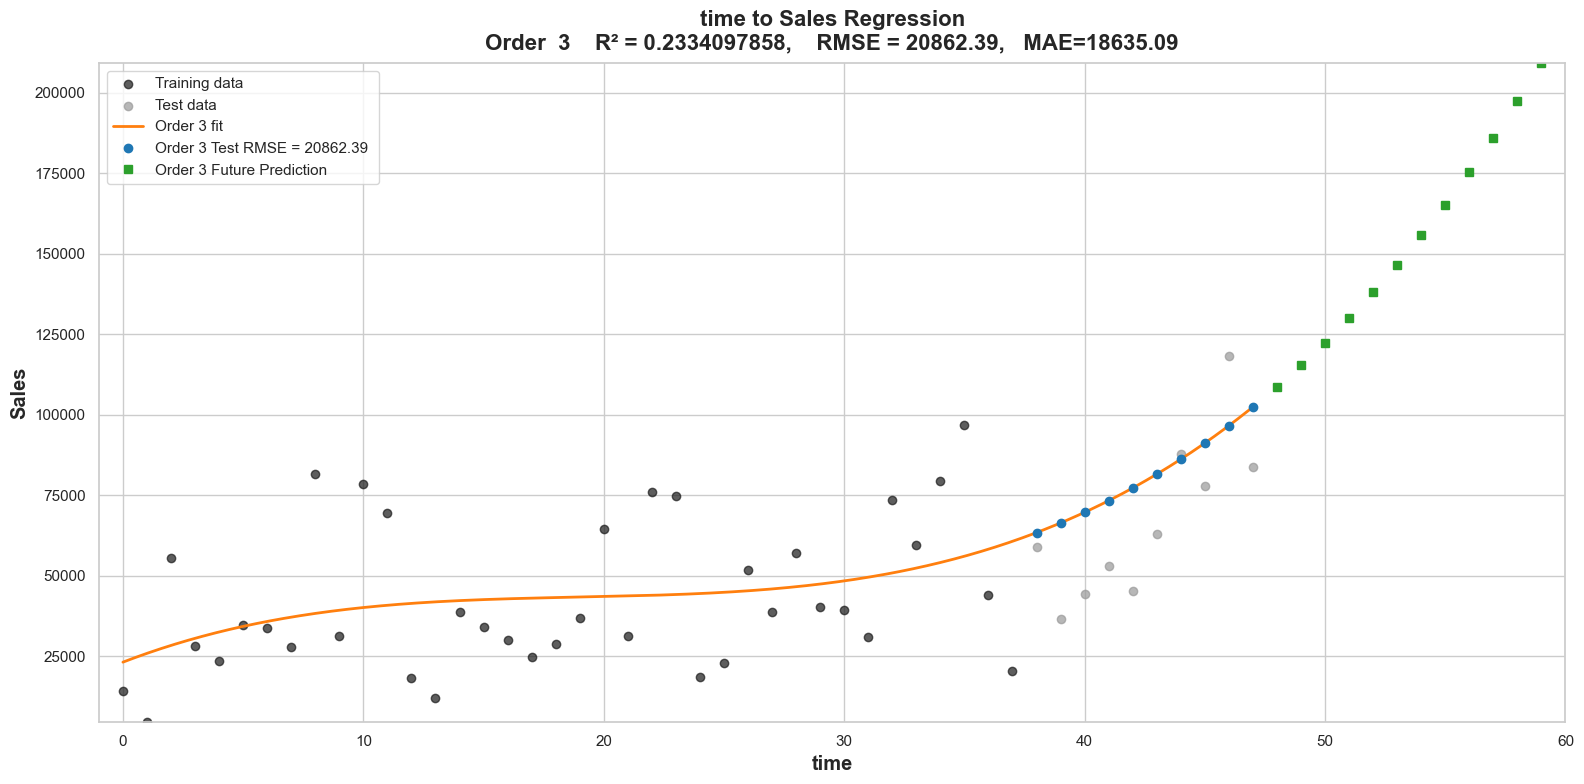

In [56]:

def plot_trend_with_predictions(df, dfx, dfy, order, colors):
    sns.set_style('whitegrid')
    plt.rc('figure', autolayout=True, figsize=(16, 8), titlesize=14, titleweight='bold')
    plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=16, titlepad=10)
    
    split_point = int(len(df) * 0.8)
    train = df.iloc[:split_point]
    test = df.iloc[split_point:]
    
    x_train = train[dfx]
    y_train = train[dfy]
    model = np.polyfit(x_train, y_train, order)
    poly = np.poly1d(model)
    
    fig, ax = plt.subplots()
    
    # Plot the training data
    ax.scatter(x_train, y_train, color='0.1', alpha=0.7, label='Training data')
    
    # Plot the test data
    x_test = test[dfx]
    y_test = test[dfy]
    ax.scatter(x_test, y_test, color='0.6', alpha=0.7, label='Test data')
    
    # Generate a range of x-values for the regression curve and predictions
    x_range = np.linspace(df[dfx].min(), df[dfx].max(), num=500)
    y_range = poly(x_range)
    
    # Plot the regression curve
    ax.plot(x_range, y_range, color=color[1], linewidth=2, label=f'Order {order} fit')
    
    # Calculate R-squared and RMSE on test set
    y_test_pred = poly(x_test)
    r_squared = round(r2_score(y_test, y_test_pred),10)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae = mean_absolute_error(y_test, y_test_pred)  

    
    # Calculate Adjusted R-squared
    n = len(y_test)
    p = order
    
    ax.plot(x_test, y_test_pred, 'o', color=color[0], label=f'Order {order} Test RMSE = {rmse:.2f} ')
    
    # Predict the next 12 x-ticks
    next_x_ticks = np.arange(df[dfx].max() + 1, df[dfx].max() + 13)
    next_y_ticks = poly(next_x_ticks)
    ax.plot(next_x_ticks, next_y_ticks, 's', color=color[2], label=f'Order {order} Future Prediction')

    # Set the title of the plot and legend
    ax.set_title(f'{dfx} to {dfy} Regression\nOrder  {order}    R² = {r_squared},    RMSE = {rmse:.2f},   MAE={mae:.2f}')
    ax.legend()

    # Set labels for axes
    ax.set_xlabel(dfx)
    ax.set_ylabel(dfy)

    # Set the plot limits
    ax.set_xlim([df[dfx].min() - 1, next_x_ticks.max() + 1])
    ax.set_ylim([min(df[dfy].min(), next_y_ticks.min()) - 1, max(df[dfy].max(), next_y_ticks.max()) + 1])

# Define a list of colors for different regression orders
color = ['#1f77b4','#ff7f0e','#2ca02c']

# Plot each order of regression on the same plot
plot_trend_with_predictions(df=monthly_sales, dfx='time', dfy='Sales', order=3, colors=color)

As we can see the R² metric is not good at all, the model can only explain ~23.34% of the veriance in the data.
RMSE and MAE are not good as well indicating ~20,000 dollars mistake avg in prediction

## Moving Average

## Model Evaluation and Comparison

Evaluating and comparing the performance of different predictive models is essential to determine the most effective approach for forecasting future sales. This involves using specific metrics to measure the accuracy and reliability of each model's forecasts. Common metrics for evaluating forecasting models include:

- **R-squared (R²)**: Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.
- **Mean Squared Error (MSE)**: Measures the average of the squares of the errors, i.e., the average squared difference between the estimated values and the actual value.
- **Mean Absolute Error (MAE)**: Measures the average of the absolute errors, i.e., the average absolute difference between the estimated values and the actual value.

This section will compare the models' performance using these metrics, providing insights into which model performs best for our sales forecasting task. The comparison will guide the final model selection for making the future sales predictions.


Using moving average to help visualizing how far the data is from average of 3 months, Maybe it can smooth the curve enough to make our model find a better trend.
Smoothing the line should take down some veriance and complexity, because of that ill need to set my order lower than the untouched data

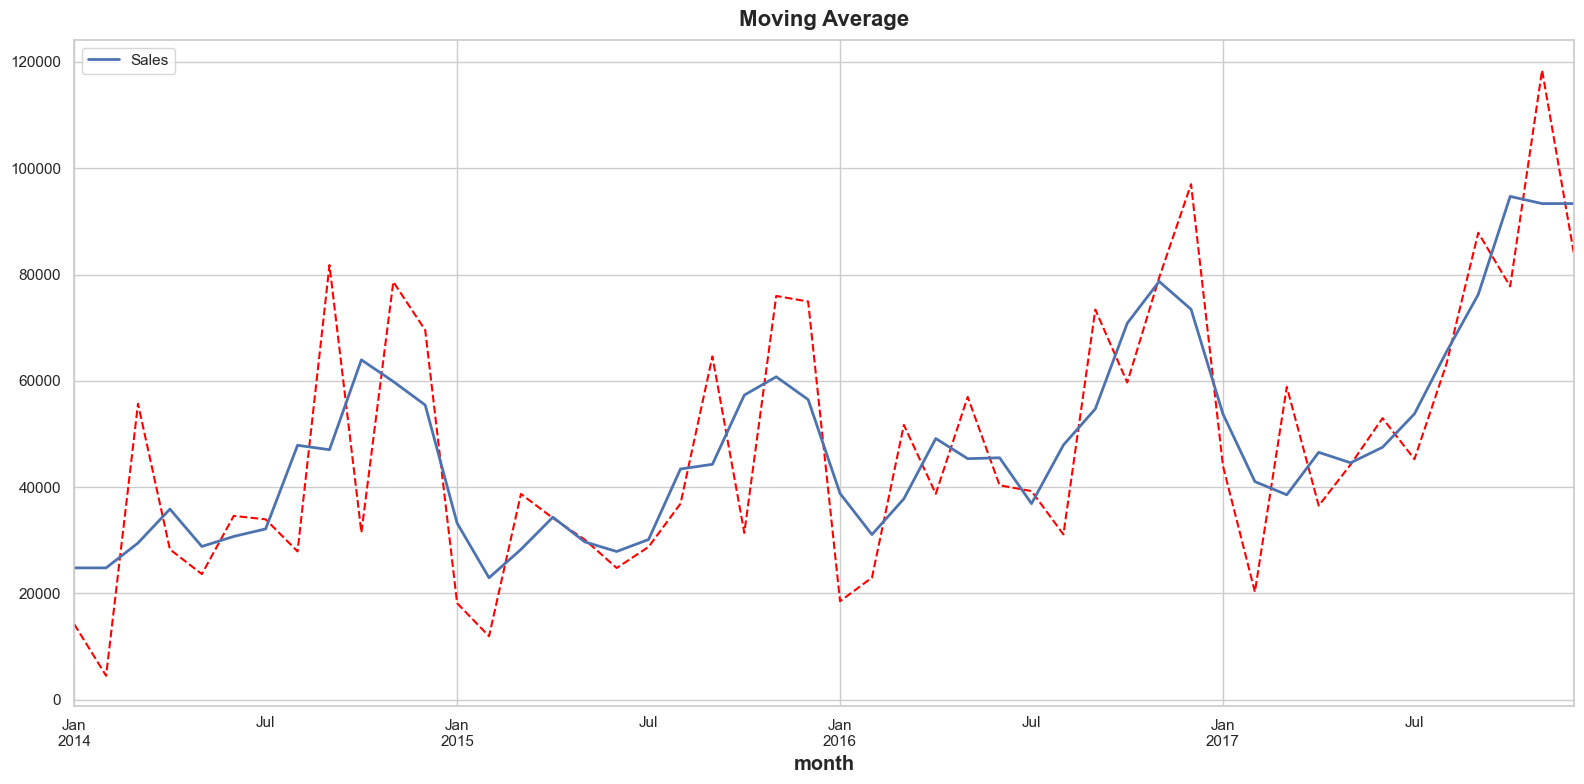

In [57]:
moving_average = pd.DataFrame(monthly_sales['Sales'].rolling(window = 3, center = True, min_periods=3).mean())
moving_average['Sales'] = moving_average['Sales'].bfill().ffill()
ax =monthly_sales['Sales'].plot(style="--", color="red")
ax.set_title('Moving Average')
moving_average.plot( ax=ax, linewidth=2,label = 'Avg Sales')
moving_average['time'] = np.arange(len(moving_average.index))
plot_trend_with_predictions(df=moving_average, dfx='time', dfy='Sales', order=2, colors=color)

In [58]:
fourier = CalendarFourier(freq = 'M', order =2)
dp = DeterministicProcess(
    index=monthly_sales.index,  # dates from the training data
    constant=True,       # dummy feature (y_intercept)
    order=2,             # time dummy (trend)
    additional_terms = [fourier],
    seasonal =True,
    drop=True,           # drop terms if necessary to avoid collinearity
)
X = dp.in_sample()

In [59]:
X

const  trend  trend_squared  s(2,12)  s(3,12)  s(4,12)  s(5,12)  \
month                                                                      
2014-01    1.0    1.0            1.0      0.0      0.0      0.0      0.0   
2014-02    1.0    2.0            4.0      1.0      0.0      0.0      0.0   
2014-03    1.0    3.0            9.0      0.0      1.0      0.0      0.0   
2014-04    1.0    4.0           16.0      0.0      0.0      1.0      0.0   
2014-05    1.0    5.0           25.0      0.0      0.0      0.0      1.0   
2014-06    1.0    6.0           36.0      0.0      0.0      0.0      0.0   
2014-07    1.0    7.0           49.0      0.0      0.0      0.0      0.0   
2014-08    1.0    8.0           64.0      0.0      0.0      0.0      0.0   
2014-09    1.0    9.0           81.0      0.0      0.0      0.0      0.0   
2014-10    1.0   10.0          100.0      0.0      0.0      0.0      0.0   
2014-11    1.0   11.0          121.0      0.0      0.0      0.0      0.0   
2014-12    1.0   12.0          144.0      0.0      0.0      0.0      0.0   
2015-01    1.0   13.0          169.0      0.0      0.0      0.0      0.0   
2015-02    1.0   14.0          196.0      1.0      0.0      0.0      0.0   
2015-03    1.0   15.0          225.0      0.0      1.0      0.0      0.0   
2015-04    1.0   16.0          256.0      0.0      0.0      1.0      0.0   
2015-05    1.0   17.0          289.0      0.0      0.0      0.0      1.0   
2015-06    1.0   18.0          324.0      0.0      0.0      0.0      0.0   
2015-07    1.0   19.0          361.0      0.0      0.0      0.0      0.0   
2015-08    1.0   20.0          400.0      0.0      0.0      0.0      0.0   
2015-09    1.0   21.0          441.0      0.0      0.0      0.0      0.0   
2015-10    1.0   22.0          484.0      0.0      0.0      0.0      0.0   
2015-11    1.0   23.0          529.0      0.0      0.0      0.0      0.0   
2015-12    1.0   24.0          576.0      0.0      0.0      0.0      0.0   
2016-01    1.0   25.0          625.0      0.0      0.0      0.0      0.0   
2016-02    1.0   26.0          676.0      1.0      0.0      0.0      0.0   
2016-03    1.0   27.0          729.0      0.0      1.0      0.0      0.0   
2016-04    1.0   28.0          784.0      0.0      0.0      1.0      0.0   
2016-05    1.0   29.0          841.0      0.0      0.0      0.0      1.0   
2016-06    1.0   30.0          900.0      0.0      0.0      0.0      0.0   
2016-07    1.0   31.0          961.0      0.0      0.0      0.0      0.0   
2016-08    1.0   32.0         1024.0      0.0      0.0      0.0      0.0   
2016-09    1.0   33.0         1089.0      0.0      0.0      0.0      0.0   
2016-10    1.0   34.0         1156.0      0.0      0.0      0.0      0.0   
2016-11    1.0   35.0         1225.0      0.0      0.0      0.0      0.0   
2016-12    1.0   36.0         1296.0      0.0      0.0      0.0      0.0   
2017-01    1.0   37.0         1369.0      0.0      0.0      0.0      0.0   
2017-02    1.0   38.0         1444.0      1.0      0.0      0.0      0.0   
2017-03    1.0   39.0         1521.0      0.0      1.0      0.0      0.0   
2017-04    1.0   40.0         1600.0      0.0      0.0      1.0      0.0   
2017-05    1.0   41.0         1681.0      0.0      0.0      0.0      1.0   
2017-06    1.0   42.0         1764.0      0.0      0.0      0.0      0.0   
2017-07    1.0   43.0         1849.0      0.0      0.0      0.0      0.0   
2017-08    1.0   44.0         1936.0      0.0      0.0      0.0      0.0   
2017-09    1.0   45.0         2025.0      0.0      0.0      0.0      0.0   
2017-10    1.0   46.0         2116.0      0.0      0.0      0.0      0.0   
2017-11    1.0   47.0         2209.0      0.0      0.0      0.0      0.0   
2017-12    1.0   48.0         2304.0      0.0      0.0      0.0      0.0   

         s(6,12)  s(7,12)  s(8,12)  s(9,12)  s(10,12)  s(11,12)  s(12,12)  
month                                                                      
2014-01      0.0      0.0      0.0      0.0       0.0   

In [60]:
y = monthly_sales['Sales']
model = LinearRegression(fit_intercept=True)
model.fit(X[:-12],y[:-12])
y_pred = pd.Series(model.predict(X[-12:]), index = X[-12:].index)
y_forecast = pd.Series(model.predict(dp.out_of_sample(steps = 12)), index = dp.out_of_sample(steps = 12).index)
y_deseason = monthly_sales['Sales']-y_pred


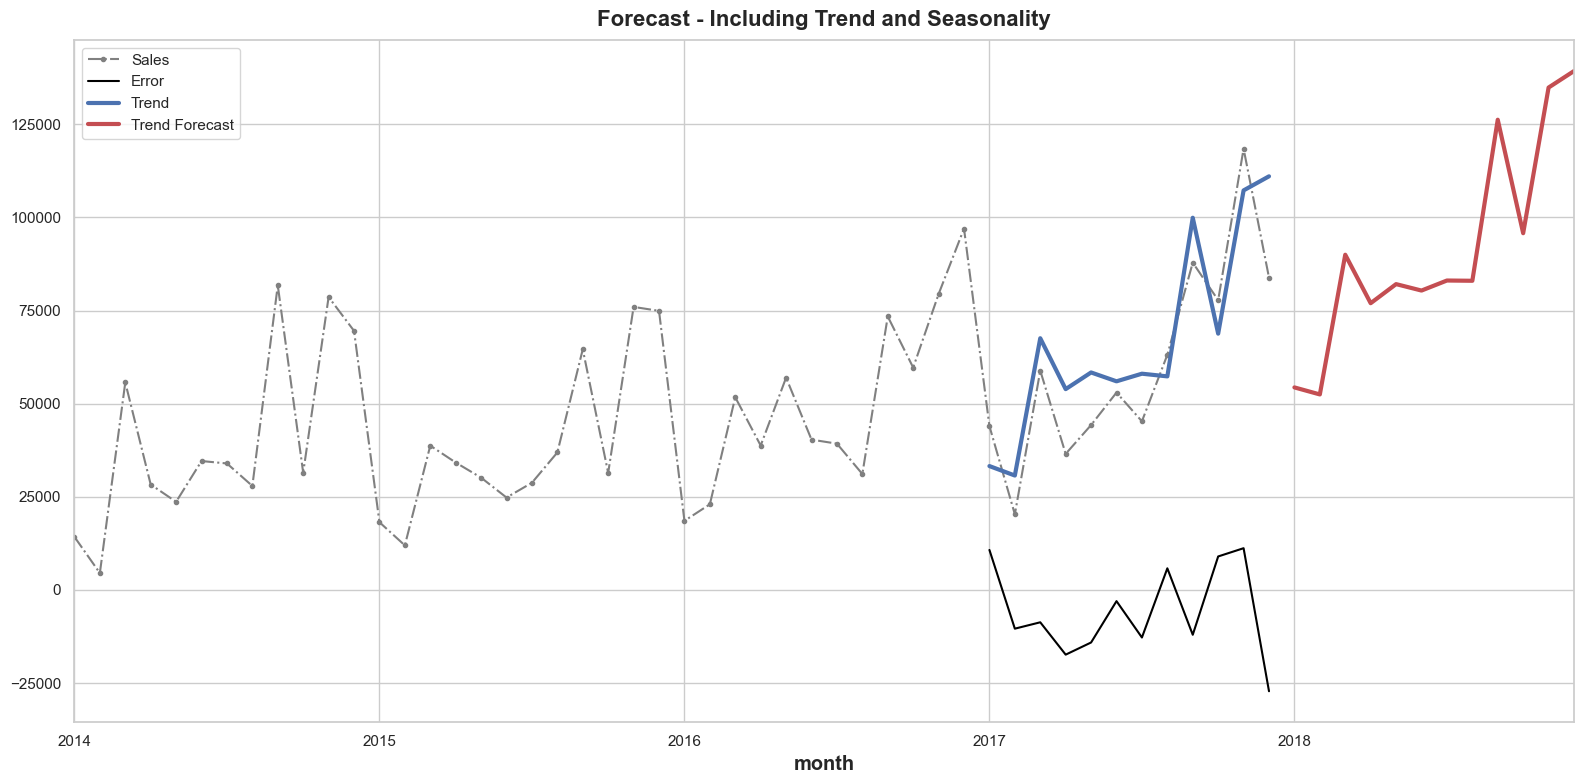

In [61]:
ax = monthly_sales['Sales'].plot(style="-..", color="0.5", title="Forecast - Including Trend and Seasonality")
ax = y_deseason.plot(ax=ax,color ='black', label= 'Error')
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend")
ax = y_forecast.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')
ax.legend()

In [62]:
r_squared = r2_score ( monthly_sales['Sales'][-12:],y_pred.tail(12))
rmse = np.sqrt(mean_squared_error(monthly_sales['Sales'][-12:], y_pred.tail(12)))
mae = mean_absolute_error(monthly_sales['Sales'][-12:], y_pred.tail(12)) # Calculate MAE
print(f"R^2: {r_squared},\nRMSE: {rmse},\nMAE: {mae}")
mae/(monthly_sales['Sales'].tail(12).mean())


R^2: 0.7368600335712698,
RMSE: 13221.070909750557,
MAE: 11861.971527797155


0.19413624760813064

In [63]:
r_squared = r2_score ( monthly_sales['Sales'][-12:],y_pred.tail(12))
r_squared

0.7368600335712698

In [64]:
X_train= X.loc[:'2016-12']
X_test = X.loc['2017-01':]
y_train = y.loc[:'2016-12']
y_test = y.loc['2017-01':]
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators = 100 , estimator = LinearRegression(), loss='exponential', learning_rate = 0.1, random_state =42)
ada.fit(X_train,y_train)

y_pred2 = pd.Series(ada.predict(X_train), index = X_train.index)
y_pred3 = pd.Series(ada.predict(X_test), index = X_test.index)
y_forecast2 = pd.Series(ada.predict(dp.out_of_sample(steps = 12)), index = dp.out_of_sample(steps = 12).index)
# r_squared_fit = r2_score(y_train,y_pred2)
r_squared_fit = r2_score(y_train,y_pred2)
r_squared_test = r2_score(y_test,y_pred3)
mae_fit = mean_absolute_error(y_train, y_pred2) 
mae_test = mean_absolute_error(y_test, y_pred3) 
rmse_fit = np.sqrt(mean_squared_error(y_train, y_pred2))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred3))



print(f'r_squared_fit: {r_squared_fit}\nr_squared_test: {r_squared_test}')
print(f'mae_fit: {mae_fit}\nmae_test:  {mae_test}')
print(f'rmse_fit: {rmse_fit}\nrmse_test:  {rmse_test}')


r_squared_fit: 0.9413780801798332
r_squared_test: 0.7344524652561972
mae_fit: 4413.773100406166
mae_test:  12016.882791561047
rmse_fit: 5571.072193315846
rmse_test:  13281.415515258135


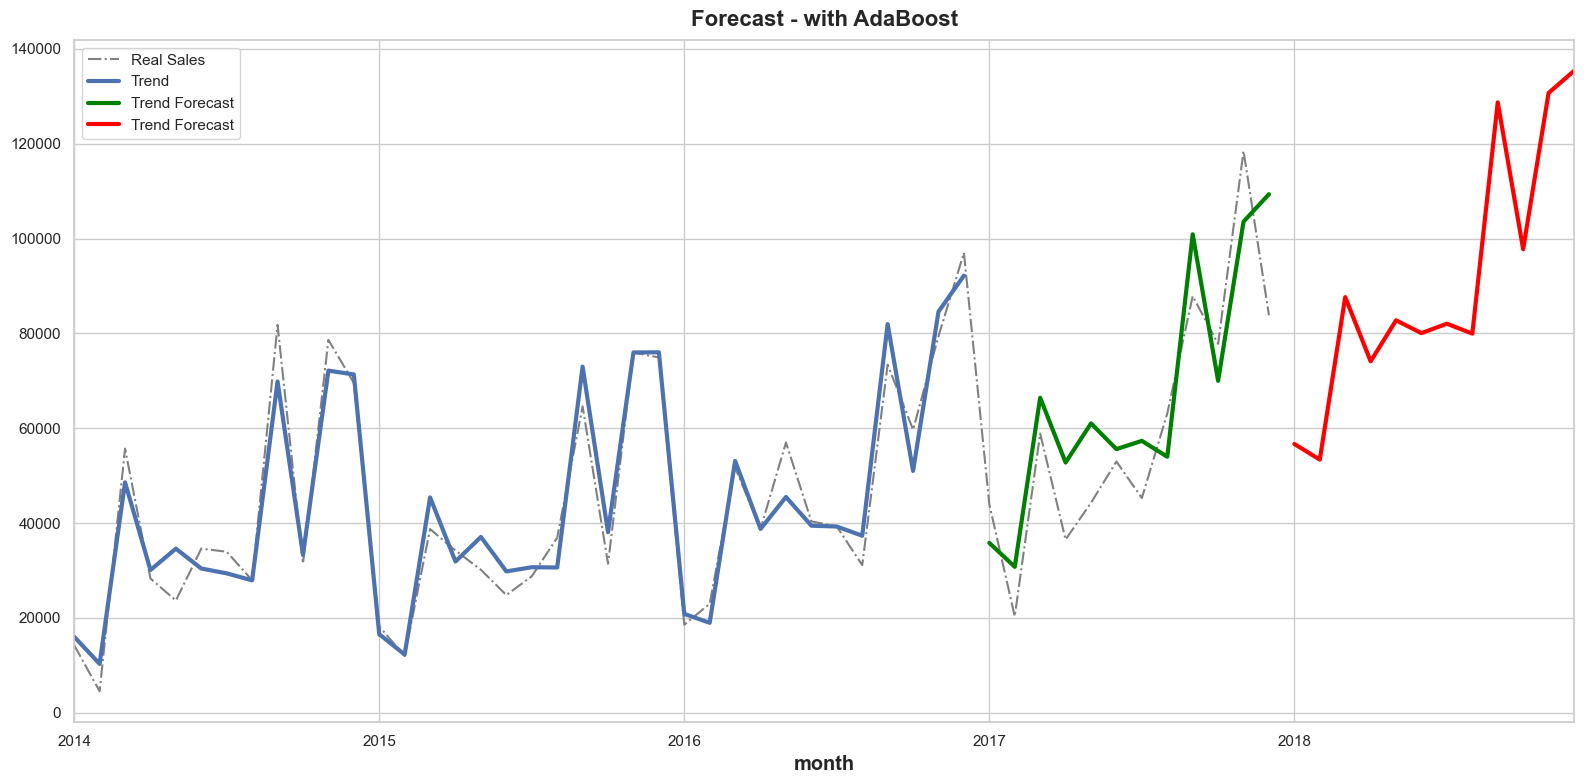

In [65]:
ax = y.plot(style="-.", color="0.5", title="Forecast - with AdaBoost" ,label='Real Sales')
ax = y_pred2.plot(ax=ax, linewidth=3, label="Trend")
ax = y_pred3.plot(ax=ax, linewidth=3, label="Trend Forecast", color='green')
ax = y_forecast2.plot(ax=ax, linewidth=3, label="Trend Forecast", color='red')
plt.legend()

This a modified code snippes from
https://www.kaggle.com/code/alkanerturan/storesalesforecast-3-diff-models
It has been modified to create test data and measure r2_squared score for test data

In [66]:
df=df[['Order Date','Sales']]
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Set the 'Date' column as the index
df.set_index('Order Date', inplace=True)

# Now you can resample
monthly_sales = df['Sales'].resample('MS').mean()
df = df.sort_values('Order Date')
df = df.groupby('Order Date')['Sales'].sum().reset_index()
df.set_index('Order Date', inplace=True)
print(df.index)
df.head()

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1237, freq=None)


Sales
Order Date          
2014-01-03    16.448
2014-01-04   288.060
2014-01-05    19.536
2014-01-06  4407.100
2014-01-07    87.158

In [67]:
monthly_sales = df['Sales'].resample('MS').sum()


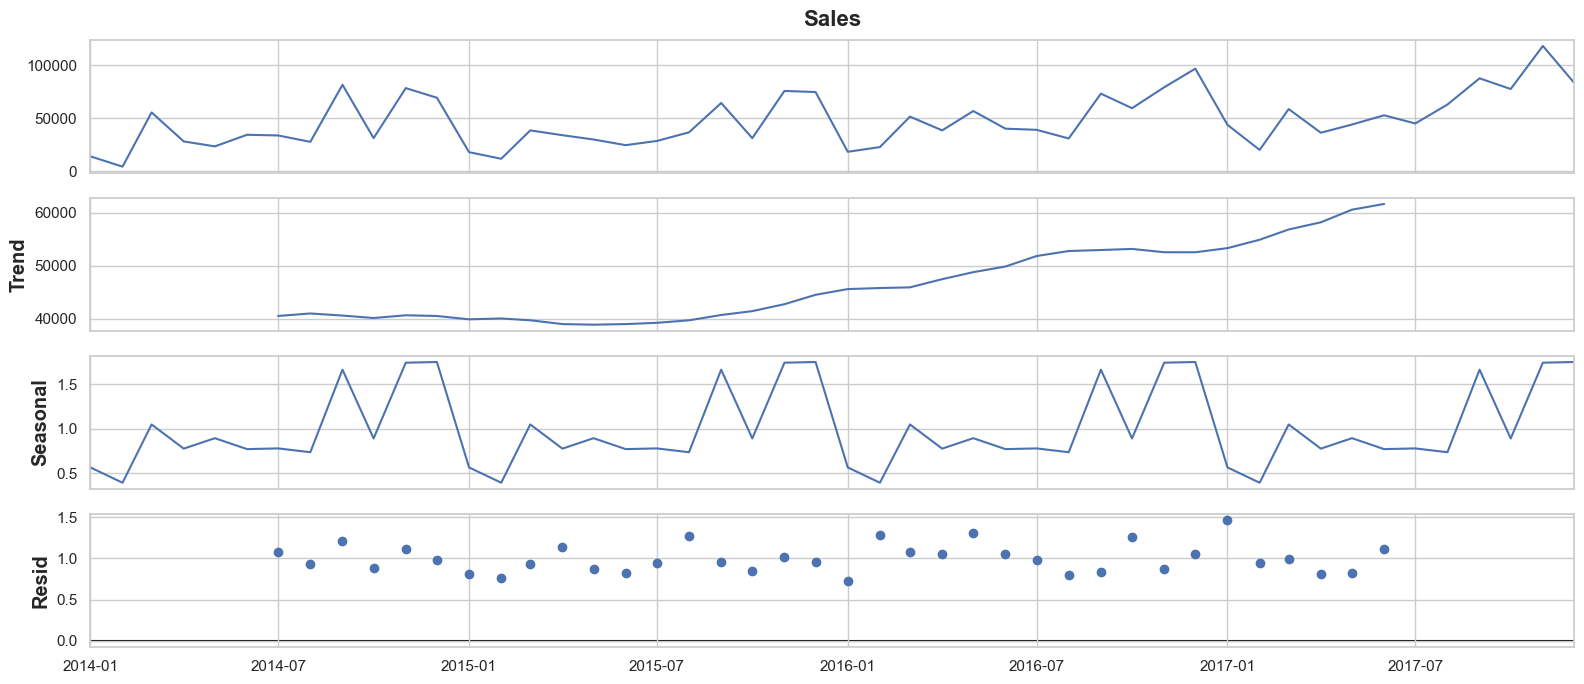

In [68]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 16, 7

decomposition = sm.tsa.seasonal_decompose(monthly_sales, model = 'multiplicative')
fig = decomposition.plot()
plt.show()


In [69]:
import itertools
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

In [70]:
min_aic =10000

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_sales, order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            if results.aic < min_aic:
                min_aic = results.aic
        except:
            continue
min_aic

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1160.5400666588448
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:29757.745561164233
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:775.414286797529
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:523.8023364165209
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:793.9674118260375
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:769.3633712808249
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:540.3032550304656
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:510.7842997458199
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1115.3155562615286


C:\Users\itayma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\itayma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


C:\Users\itayma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\itayma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\itayma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters exce

ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:27134.51599812268
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:753.9530061947411
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:495.1761564128346
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:859.3170830321716
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:813.2839031747793
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:538.5577394860138
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:496.8432717051139
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1074.154327699259
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1452.134538388773
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:765.7366800342922
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:493.420142936855
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:780.7290097436585


C:\Users\itayma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\itayma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\itayma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum L

ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1567.7803907630691
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:518.6545590765769
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:493.5581167773926
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1036.3714012124506
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:13277.43347830009
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:729.078329222877


C:\Users\itayma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\itayma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\itayma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters exce

ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:465.5000604551779
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:775.960757454114


C:\Users\itayma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\itayma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\itayma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters exce

ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:10899.116697318932
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:508.68063781892704
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:467.12336325089194
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1096.4174431098959
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:15275.547883436997
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:774.1567847365153
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:514.7666173494592
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:794.2922439748132
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:793.5332102336284
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:515.1717694350966
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:515.1664310876794
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1061.59899052586


C:\Users\itayma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\itayma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\itayma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters exce

ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:12692.082234692154
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:754.0830653519131
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:486.65892782387533
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:789.7945346378536
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:765.9282517417789
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:507.8851283824441


C:\Users\itayma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\itayma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:487.79393560178227
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1067.4898125539612
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:12277.088638403851
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:756.079265485124
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:490.8735858138044
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:768.6914115473616
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:9009.793268171536
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:492.1293837931812


C:\Users\itayma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:491.7184435966871
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1037.3708559853048
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:8766.359971072534
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:729.5110750251855


C:\Users\itayma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:466.9806374288813
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:768.5826542037048
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:6916.2467943925685
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:489.04770158798493
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:468.4717592404429


C:\Users\itayma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


465.5000604551779

In [71]:
mod = sm.tsa.statespace.SARIMAX(monthly_sales, order = (0,1,1),
                               seasonal_order = (0,1,1,12),
                               enforce_stationarity = False,
                               enforce_invertibility = False)

results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9373      0.139     -6.723      0.000      -1.211      -0.664
ma.S.L12      -0.3912      0.274     -1.426      0.154      -0.929       0.147
sigma2      2.435e+08   3.92e-11   6.22e+18      0.000    2.43e+08    2.43e+08


C:\Users\itayma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [72]:

# Split the data into training and testing datasets
train_data = monthly_sales.iloc[:-12]  # Training data excludes the last 12 months
test_data = monthly_sales.iloc[-12:]   # Testing data includes the last 12 months

# Fit the SARIMAX model on the training data
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

# Get predictions starting from the beginning of the test data


# Forecast for an additional 12 months beyond the dataset
pred_future = results.get_forecast(steps=12)
pred_future_ci = pred_future.conf_int()
# Set the seaborn style
sns.set(style='whitegrid')

# Create the plot with figsize to match the aspect ratio of the example
fig, ax = plt.subplots(figsize=(14, 7))

# Plot observed values from the start of the training data
sns.lineplot(data=train_data, ax=ax, label='Observed (Training)', color='navy', linewidth=2)

# Plot observed values from the test data
sns.lineplot(data=test_data, ax=ax, label='Observed (Test)', color='orange', linewidth=2)


# Plot the forecasted values for the future 12 months
ax.plot(pred_future.predicted_mean.index, pred_future.predicted_mean, label='Forecast Test', color='red', alpha=0.8, linewidth=2, linestyle='--')

# Fill the confidence interval for the forecasted values with transparency

# Fill the confidence interval for the future forecast with transparency
ax.fill_between(pred_future_ci.index, pred_future_ci.iloc[:, 0], pred_future_ci.iloc[:, 1], color='red', alpha=0.2)

# Enhance labels and titles with bold font
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Sales', fontsize=12, fontweight='bold')
ax.set_title('Sales Forecast vs Actuals', fontsize=14, fontweight='bold')

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Adjust the legend placement and make it more transparent
leg = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
for line in leg.get_lines():
    line.set_linewidth(4)
leg.get_frame().set_alpha(0.5)

# Set the plot's layout to tight for the figsize
plt.tight_layout()

# Show the plot
plt.show()



C:\Users\itayma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Calculate metrics for test data

r2_test = r2_score(monthly_sales[-12:], pred_future.predicted_mean)
rmse_test = np.sqrt(mean_squared_error(monthly_sales[-12:], pred_future.predicted_mean))
mae_test = mean_absolute_error(monthly_sales[-12:], pred_future.predicted_mean)

(r2_test, rmse_test, mae_test)

(0.6385525526993577, 15495.150829538734, 13006.710975141841)

In [74]:
df = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Resample to monthly frequency and sum sales
monthly_data = df.resample('M', on='Order Date').sum()
monthly_data.reset_index(inplace=True)
monthly_data = monthly_data.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Splitting data into training and testing sets
data_train = monthly_data.iloc[:-12]
data_test = monthly_data.iloc[-12:]

# Initialize and fit the Prophet model
model = Prophet()
model.fit(data_train)

# Extend the forecast by creating a future dataframe for the next 24 months
future = model.make_future_dataframe(periods=24, freq='M')
forecast = model.predict(future)

# Plotting the forecast alongside actual data
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['ds'], monthly_data['y'], label='Monthly Sales (Actual Data)', color="0.5", linestyle="dashed")
plt.plot(monthly_data['ds'], forecast['yhat'][:len(monthly_data)], label='Fitted Data', color="blue")
plt.plot(future['ds'][-24:], forecast['yhat'][-24:], label='Forecast', color='red')
plt.fill_between(future['ds'][-24:], forecast['yhat_lower'][-24:], forecast['yhat_upper'][-24:], color='red', alpha=0.2)

plt.legend()
plt.xlabel('Order Date')
plt.ylabel('Monthly Sales')
plt.title('Extended Prophet Model Forecast')
plt.show()

# Evaluate model performance for the initial forecast period
# Extract actual and fitted data for comparison
actual_data = monthly_data['y'][:-12]  # Actual data excluding the test period
fitted_data = forecast['yhat'][:len(actual_data)]

r_squared_fit = r2_score(actual_data, fitted_data)
mae_fit = mean_absolute_error(actual_data, fitted_data)
rmse_fit = np.sqrt(mean_squared_error(actual_data, fitted_data))

print(f'R-squared score for fitted data: {r_squared_fit:.4f}')
print(f'MAE for fitted data: {mae_fit:.4f}')
print(f'RMSE for fitted data: {rmse_fit:.4f}')

# Evaluate model performance on the test data
actual_test = monthly_data['y'][-12:]  # Actual sales for the test period
forecasted_test = forecast['yhat'][-12:]  # Forecasted sales for the test period

r_squared_test = r2_score(actual_test, forecasted_test)
mae_test = mean_absolute_error(actual_test, forecasted_test)
rmse_test = np.sqrt(mean_squared_error(actual_test, forecasted_test))

print(f'R-squared score for test data: {r_squared_test:.4f}')
print(f'MAE for test data: {mae_test:.4f}')
print(f'RMSE for test data: {rmse_test:.4f}')


17:38:08 - cmdstanpy - INFO - Chain [1] start processing
17:38:08 - cmdstanpy - INFO - Chain [1] done processing


R-squared score for fitted data: 0.9513
MAE for fitted data: 3997.4612
RMSE for fitted data: 5075.3024
R-squared score for test data: 0.7583
MAE for test data: 11163.8804
RMSE for test data: 12670.6211


## Conclusion and Business Implications

The final section of this notebook summarizes the findings from our predictive modeling, highlighting the model that provided the most accurate and reliable sales forecasts. We will discuss the implications of these findings for inventory management and supply chain optimization, offering insights into how businesses can leverage predictive analytics to make informed decisions.

Accurate sales forecasting enables businesses to optimize inventory levels, reducing the costs associated with overstocking or stockouts. By aligning inventory with expected demand, companies can improve customer satisfaction, enhance operational efficiency, and increase profitability.

We will also outline potential next steps, including how the forecasting model can be integrated into business processes and what additional data or analysis could further refine the sales predictions.
